   trial  iteration recommender   dataset                      ml-rec  \
0      0          0      random    tokyo1  GradientBoostingClassifier   
1      0          1      random  allhyper      RandomForestClassifier   
2      0          2      random       dna                         SVC   
3      0          3      random  haberman      RandomForestClassifier   
4      0          4      random     labor                         SVC   

                                               p-rec  score-rec  bal_accuracy  \
0  OrderedDict([('learning_rate', 1.0), ('loss', ...        0.0      0.913276   
1  OrderedDict([('criterion', 'entropy'), ('max_f...        0.0      0.654496   
2  OrderedDict([('C', 0.01), ('coef0', 50.0), ('d...        0.0      0.965570   
3  OrderedDict([('criterion', 'gini'), ('max_feat...        0.0      0.552593   
4  OrderedDict([('C', 0.01), ('coef0', 0.5), ('de...        0.0      0.500000   

   max_bal_accuracy  delta_bal_accuracy  
0          0.930476            0

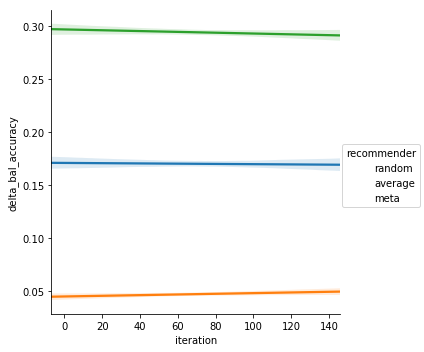

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

experiment = '../experiment_random-average-meta_1recs_100trials_10init.csv'
df_exp = pd.read_csv(experiment,sep='\t')
print(df_exp[:5])
print(df_exp.columns)
plt.figure(figsize=(20,10))

sb.lmplot(data=df_exp, x='iteration',y='delta_bal_accuracy',hue='recommender',markers='')
#sb.tsplot(data=df, time="iteration", condition="recommender", value="bal_accuracy", 
#          err_style="ci_bars", estimator=np.median)
# sb.boxplot(data=df,x='iteration',y='bal_accuracy',hue='recommender')
#plt.ylim([0.5,1])
plt.savefig(experiment[:-4]+'accuracy_comparison.pdf')

algs: ['KNeighborsClassifier', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier']
ave_count_mat (5, 140)


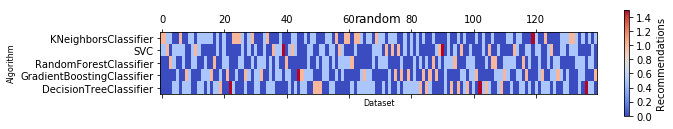

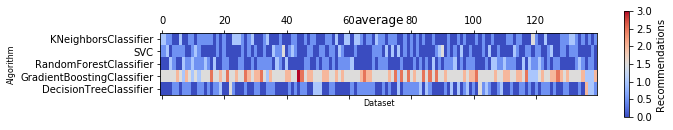

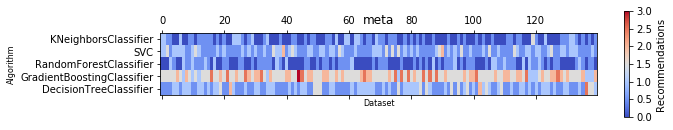

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# generate figure of heatmap showing counts of which ML methods are recommended over time
experiment = '../experiment_random-average-meta_1recs_10trials_10init.csv'
# experiment = '../experiment_random-average_100recs_500trials_1init.csv'
accumulate = False

df = pd.read_csv(experiment,sep='\t')
n_trials = df['trial'].max()
ave_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))                     
rand_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))
algs = list(df['ml-rec'].unique())
iterations = df['iteration'].unique()
print('algs:',algs)
print('ave_count_mat',ave_count_mat.shape)
recommenders = ['random','average','meta']

for recommender in recommenders:
    dfa = df.loc[df['recommender']==recommender,:]

    dfa.groupby('iteration').count() #.groupby('ml-rec').count()

    for index,row in dfa.iterrows():
        ave_count_mat[algs.index(row['ml-rec']),row['iteration']] += 1/n_trials
    # cumulative sum
    if accumulate:
        for i,a in enumerate(ave_count_mat): 
            ave_count_mat[i] = np.cumsum(a)
    #print('ave_count_mat:',ave_count_mat)

    h = plt.figure(figsize=(10, 15))
    ax = h.gca()
    tmp = ax.matshow(ave_count_mat,cmap=plt.cm.coolwarm)
    # sb.heatmap(ave_count_mat)#,
               #cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
    #            square=False, annot=True, vmin=0., vmax=1.0,
    #            xticklabels=iterations, yticklabels=algs, cbar=False)
    cbar=plt.colorbar(tmp,ax=ax,orientation='vertical',shrink=0.1)
    cbar.set_label('Recommendations')
    ax.set_yticks(np.arange(len(algs)))
    ax.set_yticklabels(algs)
    ax.set_xlabel('Dataset', fontsize=8)
    ax.set_ylabel('Algorithm', fontsize=8)
    plt.title(recommender)
    #plt.title('ML Recommendations over many datasets', fontsize=18)
    ax.set_aspect(4)
    h.tight_layout()
    if accumulate:
        h.savefig(experiment[:-4]+'_'+recommender+'_heatmap_cumulative.pdf', bbox_inches='tight')
    else:
        h.savefig(experiment[:-4]+'_'+recommender+'_heatmap.pdf', bbox_inches='tight')
plt.show()